# Linear Regression

linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.

y = a_0 + a_1 * x    ## Linear Equation

The motive of the linear regression algorithm is to find the best values for a_0 and a_1.

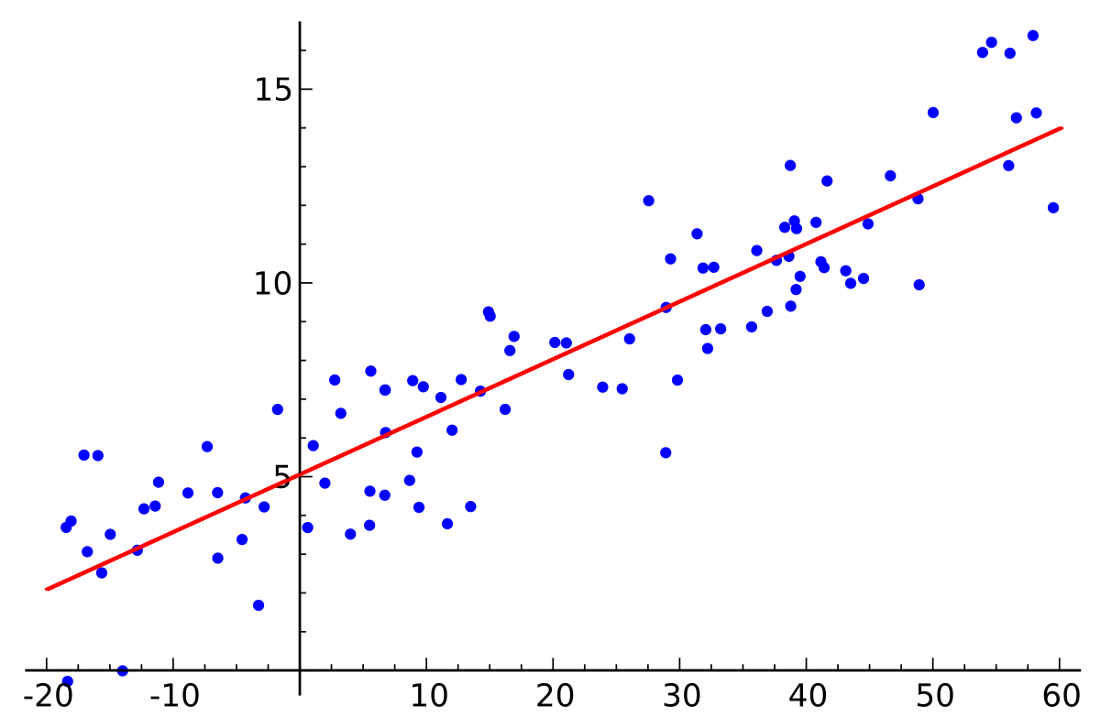

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split

In [4]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.csv',delim_whitespace=True,names=columns)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df = df/df.max()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040612,0.113636,0.401470,0.069170,0.636849,0.715790,0.685749,0.312954,0.397892,0.574173,0.838888,0.898650,0.333238,0.450656
std,0.096672,0.233225,0.247309,0.253994,0.133040,0.080025,0.281489,0.173645,0.362802,0.237042,0.098407,0.230020,0.188071,0.183942
min,0.000071,0.000000,0.016583,0.000000,0.442021,0.405581,0.029000,0.093151,0.041667,0.263010,0.572727,0.000806,0.045562,0.100000
25%,0.000922,0.000000,0.187094,0.000000,0.515499,0.670330,0.450250,0.173189,0.166667,0.392405,0.790909,0.945773,0.183039,0.340500
50%,0.002883,0.000000,0.349315,0.000000,0.617681,0.707118,0.775000,0.264499,0.208333,0.464135,0.865909,0.986243,0.299184,0.424000
75%,0.041327,0.125000,0.652487,0.000000,0.716418,0.754385,0.940750,0.427858,1.000000,0.936709,0.918182,0.998299,0.446537,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


From Correlation data, We can confim that variable LSTAT, RM, AGE and PTRATIO have good corelation with our output variable MEDV. These variables we need to consider when we optimze our predictive value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025881396C18>,
      dtype=object)

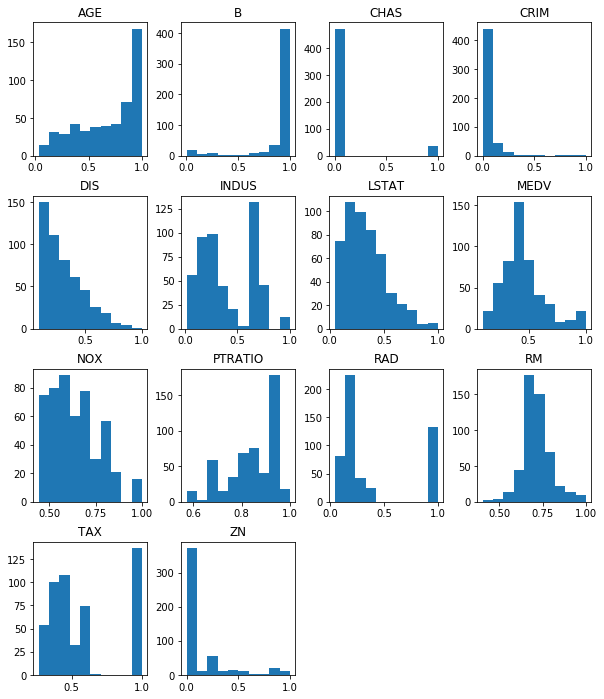

In [7]:
df.hist(bins=10,figsize=(10,12),grid=False)

We can see that some variables have an exponential distribution, such as CRIM, ZN, AGE and B. We can see that others have a bimodal distribution such as RAD and TAX.

I do feel features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded. Analysis from above data: 1)increase in RM value increases MEDV value ie price of the home. 2) Lower the value of LSTAT higher the value of MEDV 3) PTRATIO decrease in the value increases MEDV

In [8]:
drop_columns = ['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD','B','MEDV']
Data = df.drop(columns=drop_columns,axis=1)
Data['f0'] = np.ones((Data.shape[0],1),dtype=int)
Data.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,f0
0,0.083273,0.748861,0.416315,0.695455,0.131156,1
1,0.254867,0.731321,0.340366,0.809091,0.240716,1
2,0.254867,0.818337,0.340366,0.809091,0.106136,1
3,0.078587,0.797039,0.312236,0.850000,0.077430,1
4,0.078587,0.814009,0.312236,0.850000,0.140374,1


In [9]:
Data.shape

(506, 6)

In [10]:
prices = df['MEDV']
prices.describe()

count    506.000000
mean       0.450656
std        0.183942
min        0.100000
25%        0.340500
50%        0.424000
75%        0.500000
max        1.000000
Name: MEDV, dtype: float64

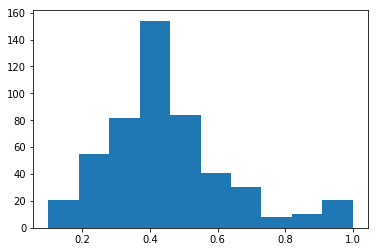

In [11]:
prices.hist(grid=False)

In [12]:
train_x,test_x,train_y,test_y = train_test_split(Data,prices,train_size=0.75)

In [13]:
# train_x["f0"] = np.ones((train_x.shape[0],1))
# train_x

# Mean Squared Error Function

In [14]:
def Mean_Squared_Error(Data,Weight,Prices):
    Predicted_Prices = np.dot(Data,Weight)
    Actual_Prices = np.array(Prices).reshape(len(Prices),1)
    
    mean_squared_error = np.mean(np.square((np.subtract(Predicted_Prices,Actual_Prices))))
    
    return(mean_squared_error)

# Derivative Function

In [15]:
def derivative(Data,Weight,Prices):
    Predicted_Prices = np.dot(Data,Weight)
    Actual_Prices = np.array(Prices).reshape(len(Prices),1)
    
    diff = np.dot((2*np.subtract(Predicted_Prices,Actual_Prices)).T, Data)
    
    return (diff.T)

In [16]:
# Predicted_Prices = np.dot(Data,old_weight)
# Actual_Prices = np.array(prices).reshape(len(prices),1)

In [17]:
# mean_squared_error = np.mean(np.square((np.subtract(Predicted_Prices,Actual_Prices))))

In [18]:
# diff = np.dot((2*np.subtract(Predicted_Prices,Actual_Prices)).T, Data)
# diff.T

# Gradient Descent Function

In [19]:
#----Gradient Descent-------
old_weight = np.random.randn(train_x.shape[1],1)
learning_rate = 0.0002
epsilon = 0.0000001
i=0
while(True):    
    old_mean_squared_error = Mean_Squared_Error(train_x,old_weight,train_y)
    print('old error:',old_mean_squared_error)
    
    new_weight = old_weight - learning_rate*derivative(train_x,old_weight,train_y)
    
    new_mean_squared_error = Mean_Squared_Error(train_x,new_weight,train_y)
    print('new error:', new_mean_squared_error)
    
    if abs(new_mean_squared_error - old_mean_squared_error) < epsilon:
        break
        
    old_weight = new_weight
    i+=1
    
    

old error: 6.675575669034781
new error: 2.3764010634549138
old error: 2.3764010634549138
new error: 0.9931257386262876
old error: 0.9931257386262876
new error: 0.5439571890184782
old error: 0.5439571890184782
new error: 0.39414749741768934
old error: 0.39414749741768934
new error: 0.34038995042317954
old error: 0.34038995042317954
new error: 0.3175630501288823
old error: 0.3175630501288823
new error: 0.3048043897829279
old error: 0.3048043897829279
new error: 0.29542732041802355
old error: 0.29542732041802355
new error: 0.2872856421476846
old error: 0.2872856421476846
new error: 0.27968753479630176
old error: 0.27968753479630176
new error: 0.27240712574015447
old error: 0.27240712574015447
new error: 0.26536790407057476
old error: 0.26536790407057476
new error: 0.2585413185986223
old error: 0.2585413185986223
new error: 0.2519142965810063
old error: 0.2519142965810063
new error: 0.24547883696859882
old error: 0.24547883696859882
new error: 0.2392286739398607
old error: 0.23922867393986

new error: 0.022363368728664994
old error: 0.022363368728664994
new error: 0.02232072095684996
old error: 0.02232072095684996
new error: 0.022278546134973053
old error: 0.022278546134973053
new error: 0.022236833791777877
old error: 0.022236833791777877
new error: 0.022195573743015062
old error: 0.022195573743015062
new error: 0.0221547560832015
old error: 0.0221547560832015
new error: 0.02211437117761853
old error: 0.02211437117761853
new error: 0.022074409654542087
old error: 0.022074409654542087
new error: 0.022034862397698047
old error: 0.022034862397698047
new error: 0.021995720538936385
old error: 0.021995720538936385
new error: 0.021956975451117567
old error: 0.021956975451117567
new error: 0.021918618741205174
old error: 0.021918618741205174
new error: 0.021880642243558762
old error: 0.021880642243558762
new error: 0.021843038013420954
old error: 0.021843038013420954
new error: 0.02180579832059343
old error: 0.02180579832059343
new error: 0.021768915643296017
old error: 0.02176

old error: 0.01757716185817099
new error: 0.01756378347148505
old error: 0.01756378347148505
new error: 0.017550452835752732
old error: 0.017550452835752732
new error: 0.017537169711720767
old error: 0.017537169711720767
new error: 0.017523933861902524
old error: 0.017523933861902524
new error: 0.017510745050554912
old error: 0.017510745050554912
new error: 0.01749760304365575
old error: 0.01749760304365575
new error: 0.01748450760888163
old error: 0.01748450760888163
new error: 0.017471458515586274
old error: 0.017471458515586274
new error: 0.01745845553477933
old error: 0.01745845553477933
new error: 0.017445498439105662
old error: 0.017445498439105662
new error: 0.017432587002825024
old error: 0.017432587002825024
new error: 0.01741972100179222
old error: 0.01741972100179222
new error: 0.01740690021343762
old error: 0.01740690021343762
new error: 0.017394124416748157
old error: 0.017394124416748157
new error: 0.01738139339224865
old error: 0.01738139339224865
new error: 0.0173687069

new error: 0.015854777238992906
old error: 0.015854777238992906
new error: 0.01584699628771853
old error: 0.01584699628771853
new error: 0.015839238062506814
old error: 0.015839238062506814
new error: 0.015831502473039646
old error: 0.015831502473039646
new error: 0.01582378942945728
old error: 0.01582378942945728
new error: 0.015816098842355564
old error: 0.015816098842355564
new error: 0.015808430622783264
old error: 0.015808430622783264
new error: 0.0158007846822394
old error: 0.0158007846822394
new error: 0.015793160932670542
old error: 0.015793160932670542
new error: 0.01578555928646821
old error: 0.01578555928646821
new error: 0.015777979656466237
old error: 0.015777979656466237
new error: 0.015770421955938148
old error: 0.015770421955938148
new error: 0.01576288609859458
old error: 0.01576288609859458
new error: 0.015755371998580722
old error: 0.015755371998580722
new error: 0.01574787957047375
old error: 0.01574787957047375
new error: 0.01574040872928028
old error: 0.0157404087

new error: 0.014523830063003704
old error: 0.014523830063003704
new error: 0.014519579301625578
old error: 0.014519579301625578
new error: 0.014515338662232037
old error: 0.014515338662232037
new error: 0.014511108113576235
old error: 0.014511108113576235
new error: 0.014506887624540239
old error: 0.014506887624540239
new error: 0.014502677164134378
old error: 0.014502677164134378
new error: 0.014498476701496586
old error: 0.014498476701496586
new error: 0.014494286205891722
old error: 0.014494286205891722
new error: 0.014490105646710957
old error: 0.014490105646710957
new error: 0.014485934993471096
old error: 0.014485934993471096
new error: 0.014481774215813953
old error: 0.014481774215813953
new error: 0.014477623283505691
old error: 0.014477623283505691
new error: 0.014473482166436213
old error: 0.014473482166436213
new error: 0.014469350834618517
old error: 0.014469350834618517
new error: 0.014465229258188045
old error: 0.014465229258188045
new error: 0.014461117407402097
old erro

new error: 0.013888022866831764
old error: 0.013888022866831764
new error: 0.013885208880294247
old error: 0.013885208880294247
new error: 0.013882400920122667
old error: 0.013882400920122667
new error: 0.013879598970618185
old error: 0.013879598970618185
new error: 0.013876803016135263
old error: 0.013876803016135263
new error: 0.013874013041081455
old error: 0.013874013041081455
new error: 0.013871229029917156
old error: 0.013871229029917156
new error: 0.013868450967155362
old error: 0.013868450967155362
new error: 0.013865678837361449
old error: 0.013865678837361449
new error: 0.013862912625152933
old error: 0.013862912625152933
new error: 0.01386015231519924
old error: 0.01386015231519924
new error: 0.013857397892221473
old error: 0.013857397892221473
new error: 0.013854649340992179
old error: 0.013854649340992179
new error: 0.013851906646335146
old error: 0.013851906646335146
new error: 0.013849169793125136
old error: 0.013849169793125136
new error: 0.013846438766287696
old error:

new error: 0.013509204540679292
old error: 0.013509204540679292
new error: 0.013507177302119177
old error: 0.013507177302119177
new error: 0.01350515414429105
old error: 0.01350515414429105
new error: 0.013503135057635628
old error: 0.013503135057635628
new error: 0.013501120032621316
old error: 0.013501120032621316
new error: 0.01349910905974407
old error: 0.01349910905974407
new error: 0.013497102129527325
old error: 0.013497102129527325
new error: 0.013495099232521873
old error: 0.013495099232521873
new error: 0.013493100359305767
old error: 0.013493100359305767
new error: 0.0134911055004842
old error: 0.0134911055004842
new error: 0.01348911464668943
old error: 0.01348911464668943
new error: 0.013487127788580645
old error: 0.013487127788580645
new error: 0.0134851449168439
old error: 0.0134851449168439
new error: 0.01348316602219197
old error: 0.01348316602219197
new error: 0.013481191095364288
old error: 0.013481191095364288
new error: 0.01347922012712682
old error: 0.013479220127

new error: 0.013232482657875152
old error: 0.013232482657875152
new error: 0.013231000021202043
old error: 0.013231000021202043
new error: 0.013229520234680225
old error: 0.013229520234680225
new error: 0.013228043292098838
old error: 0.013228043292098838
new error: 0.013226569187262813
old error: 0.013226569187262813
new error: 0.013225097913992834
old error: 0.013225097913992834
new error: 0.013223629466125281
old error: 0.013223629466125281
new error: 0.013222163837512173
old error: 0.013222163837512173
new error: 0.013220701022021136
old error: 0.013220701022021136
new error: 0.01321924101353533
old error: 0.01321924101353533
new error: 0.01321778380595342
old error: 0.01321778380595342
new error: 0.013216329393189511
old error: 0.013216329393189511
new error: 0.013214877769173104
old error: 0.013214877769173104
new error: 0.013213428927849043
old error: 0.013213428927849043
new error: 0.013211982863177475
old error: 0.013211982863177475
new error: 0.013210539569133798
old error: 0

new error: 0.013021184568637116
old error: 0.013021184568637116
new error: 0.013020100455853518
old error: 0.013020100455853518
new error: 0.013019018345971823
old error: 0.013019018345971823
new error: 0.013017938234837375
old error: 0.013017938234837375
new error: 0.013016860118305135
old error: 0.013016860118305135
new error: 0.01301578399223963
old error: 0.01301578399223963
new error: 0.013014709852514966
old error: 0.013014709852514966
new error: 0.013013637695014757
old error: 0.013013637695014757
new error: 0.013012567515632125
old error: 0.013012567515632125
new error: 0.01301149931026967
old error: 0.01301149931026967
new error: 0.01301043307483944
old error: 0.01301043307483944
new error: 0.013009368805262916
old error: 0.013009368805262916
new error: 0.013008306497470956
old error: 0.013008306497470956
new error: 0.013007246147403817
old error: 0.013007246147403817
new error: 0.013006187751011079
old error: 0.013006187751011079
new error: 0.013005131304251653
old error: 0.0

old error: 0.012828136314444365
new error: 0.012827400937678405
old error: 0.012827400937678405
new error: 0.012826666855046097
old error: 0.012826666855046097
new error: 0.012825934063971393
old error: 0.012825934063971393
new error: 0.012825202561883792
old error: 0.012825202561883792
new error: 0.0128244723462183
old error: 0.0128244723462183
new error: 0.012823743414415428
old error: 0.012823743414415428
new error: 0.012823015763921173
old error: 0.012823015763921173
new error: 0.01282228939218702
old error: 0.01282228939218702
new error: 0.012821564296669906
old error: 0.012821564296669906
new error: 0.012820840474832229
old error: 0.012820840474832229
new error: 0.012820117924141812
old error: 0.012820117924141812
new error: 0.012819396642071922
old error: 0.012819396642071922
new error: 0.012818676626101217
old error: 0.012818676626101217
new error: 0.012817957873713773
old error: 0.012817957873713773
new error: 0.012817240382399035
old error: 0.012817240382399035
new error: 0.0

new error: 0.012682109593704395
old error: 0.012682109593704395
new error: 0.012681624359362216
old error: 0.012681624359362216
new error: 0.012681139929106399
old error: 0.012681139929106399
new error: 0.012680656301389348
old error: 0.012680656301389348
new error: 0.012680173474666646
old error: 0.012680173474666646
new error: 0.01267969144739705
old error: 0.01267969144739705
new error: 0.01267921021804248
old error: 0.01267921021804248
new error: 0.012678729785068007
old error: 0.012678729785068007
new error: 0.01267825014694186
old error: 0.01267825014694186
new error: 0.012677771302135408
old error: 0.012677771302135408
new error: 0.012677293249123157
old error: 0.012677293249123157
new error: 0.012676815986382735
old error: 0.012676815986382735
new error: 0.012676339512394904
old error: 0.012676339512394904
new error: 0.012675863825643535
old error: 0.012675863825643535
new error: 0.01267538892461561
old error: 0.01267538892461561
new error: 0.012674914807801205
old error: 0.012

new error: 0.012615999858577656
old error: 0.012615999858577656
new error: 0.012615621972335981
old error: 0.012615621972335981
new error: 0.012615244685494693
old error: 0.012615244685494693
new error: 0.01261486799692289
old error: 0.01261486799692289
new error: 0.012614491905491956
old error: 0.012614491905491956
new error: 0.012614116410075543
old error: 0.012614116410075543
new error: 0.012613741509549586
old error: 0.012613741509549586
new error: 0.012613367202792288
old error: 0.012613367202792288
new error: 0.012612993488684106
old error: 0.012612993488684106
new error: 0.012612620366107762
old error: 0.012612620366107762
new error: 0.012612247833948235
old error: 0.012612247833948235
new error: 0.012611875891092741
old error: 0.012611875891092741
new error: 0.012611504536430753
old error: 0.012611504536430753
new error: 0.012611133768853977
old error: 0.012611133768853977
new error: 0.01261076358725635
old error: 0.01261076358725635
new error: 0.012610393990534053
old error: 0

old error: 0.012545523211642397
new error: 0.012545253528644131
old error: 0.012545253528644131
new error: 0.012544984243724596
old error: 0.012544984243724596
new error: 0.012544715356155653
old error: 0.012544715356155653
new error: 0.012544446865210602
old error: 0.012544446865210602
new error: 0.012544178770164187
old error: 0.012544178770164187
new error: 0.012543911070292589
old error: 0.012543911070292589
new error: 0.012543643764873418
old error: 0.012543643764873418
new error: 0.012543376853185727
old error: 0.012543376853185727
new error: 0.012543110334509985
old error: 0.012543110334509985
new error: 0.01254284420812809
old error: 0.01254284420812809
new error: 0.012542578473323367
old error: 0.012542578473323367
new error: 0.012542313129380549
old error: 0.012542313129380549
new error: 0.012542048175585803
old error: 0.012542048175585803
new error: 0.012541783611226697
old error: 0.012541783611226697
new error: 0.012541519435592207
old error: 0.012541519435592207
new error:

new error: 0.012512442760810238
old error: 0.012512442760810238
new error: 0.012512220773894267
old error: 0.012512220773894267
new error: 0.01251199909869983
old error: 0.01251199909869983
new error: 0.012511777734669128
old error: 0.012511777734669128
new error: 0.012511556681245456
old error: 0.012511556681245456
new error: 0.012511335937873201
old error: 0.012511335937873201
new error: 0.012511115503997848
old error: 0.012511115503997848
new error: 0.012510895379065955
old error: 0.012510895379065955
new error: 0.012510675562525171
old error: 0.012510675562525171
new error: 0.012510456053824238
old error: 0.012510456053824238
new error: 0.012510236852412975
old error: 0.012510236852412975
new error: 0.012510017957742262
old error: 0.012510017957742262
new error: 0.012509799369264094
old error: 0.012509799369264094
new error: 0.012509581086431498
old error: 0.012509581086431498
new error: 0.012509363108698605
old error: 0.012509363108698605
new error: 0.012509145435520602
old error:

old error: 0.012455445235616607
new error: 0.012455298711665992
old error: 0.012455298711665992
new error: 0.012455152368024762
old error: 0.012455152368024762
new error: 0.012455006204390296
old error: 0.012455006204390296
new error: 0.012454860220460547
old error: 0.012454860220460547
new error: 0.012454714415934041
old error: 0.012454714415934041
new error: 0.012454568790509895
old error: 0.012454568790509895
new error: 0.012454423343887784
old error: 0.012454423343887784
new error: 0.012454278075767978
old error: 0.012454278075767978
new error: 0.012454132985851307
old error: 0.012454132985851307
new error: 0.012453988073839175
old error: 0.012453988073839175
new error: 0.012453843339433562
old error: 0.012453843339433562
new error: 0.012453698782337017
old error: 0.012453698782337017
new error: 0.012453554402252659
old error: 0.012453554402252659
new error: 0.01245341019888417
old error: 0.01245341019888417
new error: 0.012453266171935795
old error: 0.012453266171935795
new error:

new error: 0.012434227841024211
old error: 0.012434227841024211
new error: 0.012434106537976535
old error: 0.012434106537976535
new error: 0.012433985373694454
old error: 0.012433985373694454
new error: 0.012433864347954354
old error: 0.012433864347954354
new error: 0.012433743460533045
old error: 0.012433743460533045
new error: 0.01243362271120775
old error: 0.01243362271120775
new error: 0.01243350209975612
old error: 0.01243350209975612
new error: 0.012433381625956221
old error: 0.012433381625956221
new error: 0.01243326128958654
old error: 0.01243326128958654
new error: 0.012433141090425974
old error: 0.012433141090425974
new error: 0.012433021028253848
old error: 0.012433021028253848
new error: 0.012432901102849898
old error: 0.012432901102849898
new error: 0.012432781313994277
old error: 0.012432781313994277
new error: 0.012432661661467547
old error: 0.012432661661467547
new error: 0.012432542145050688
old error: 0.012432542145050688
new error: 0.012432422764525091
old error: 0.0

new error: 0.01241839777510453
old error: 0.01241839777510453
new error: 0.012418294011303063
old error: 0.012418294011303063
new error: 0.01241819035854279
old error: 0.01241819035854279
new error: 0.012418086816652026
old error: 0.012418086816652026
new error: 0.012417983385459396
old error: 0.012417983385459396
new error: 0.01241788006479385
old error: 0.01241788006479385
new error: 0.012417776854484655
old error: 0.012417776854484655
new error: 0.012417673754361388
old error: 0.012417673754361388
new error: 0.012417570764253955
old error: 0.012417570764253955
new error: 0.012417467883992563
old error: 0.012417467883992563
new error: 0.012417365113407746
old error: 0.012417365113407746
new error: 0.012417262452330347
old error: 0.012417262452330347
new error: 0.012417159900591524
old error: 0.012417159900591524
new error: 0.012417057458022745
old error: 0.012417057458022745
new error: 0.0124169551244558
old error: 0.0124169551244558
new error: 0.01241685289972278
old error: 0.012416

In [20]:
#--weight of the features(Parameter of line)____
old_weight.shape

(6, 1)

# Testing 

In [21]:
testing_value = np.array(test_x)[2]
testing_value = testing_value.reshape(1,len(testing_value))

predicted_value = np.dot(testing_value,old_weight)[0][0]

actual_value = np.array(test_y)[2]

print("Predicted Value: %.5f" %predicted_value)
print("\n Actual Value:",actual_value)

Predicted Value: 0.49833

 Actual Value: 0.5
